In [6]:
%config Completer.use_jedi = False

#hide
!pip install -Uqq fastbook
import fastbook
from fastai.vision.all import *
from fastbook import *
fastbook.setup_book()

In [7]:
path = untar_data(URLs.PASCAL_2007)

In [17]:
df = pd.read_csv(path/'train.csv')
df.head()

AttributeError: 'Series' object has no attribute 'split'

In [22]:
from functools import join
cat(e.split(' ') for e in df['labels'])

ImportError: cannot import name 'cat' from 'functools' (/usr/lib/python3.10/functools.py)

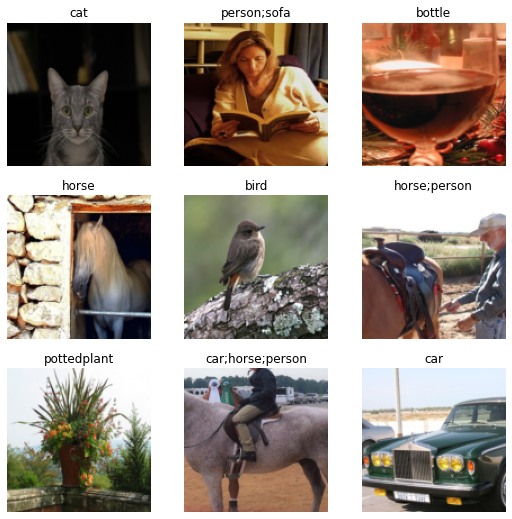

In [14]:
def getx(e): return path/'train'/e['fname']
def gety(e): return e['labels'].split(' ')
dblock = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock),
    get_x = getx,
    get_y = gety,
   item_tfms = RandomResizedCrop(128, min_scale=0.35)
)
dls = dblock.dataloaders(df)
dls.show_batch()

In [15]:
learn = cnn_learner(dls, resnet18)

/home/art/.local/lib/python3.10/site-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


In [16]:
x,y = to_cpu(dls.train.one_batch())
activs = learn.model(x)
activs.shape

torch.Size([64, 20])